In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv(r'D:\Attivo Trainning\Technical Videos\AI_ML\Jupyter Notebook Daily Practice\Day11_11_07_2025\Customer Segmentation\customer_segmentation.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.shape

(2240, 29)

In [6]:
X = df.drop("Response", axis = 1)

In [7]:
X.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,3,11
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,3,11


In [8]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [12]:
import matplotlib.pyplot as plt

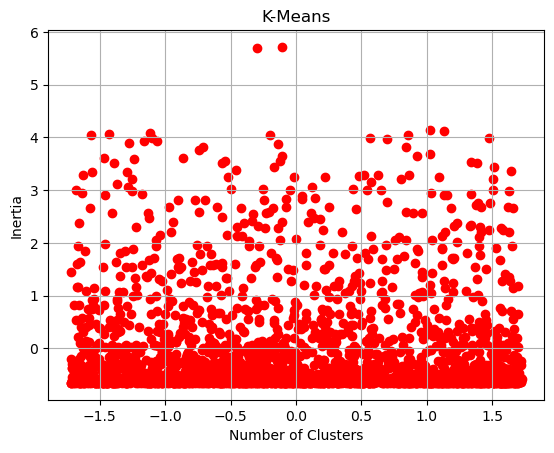

In [13]:
plt.scatter(X_scaled[:,0], X_scaled[:,10], color = 'red')
plt.title("K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 44)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=44)

In [16]:
wcsse = []
for i in range (1, 12):
    kmean = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
    kmean.fit(X_scaled)
    wcsse.append(kmean.inertia_)

In [17]:
wcsse

[1559040.0000000005,
 1556768.0783682615,
 1554439.8971318146,
 1542472.6349523515,
 1539076.8730515533,
 1537436.6072656375,
 1535126.814843784,
 1532604.434263113,
 1529882.690142815,
 1528083.078813697,
 1525846.2502496012]

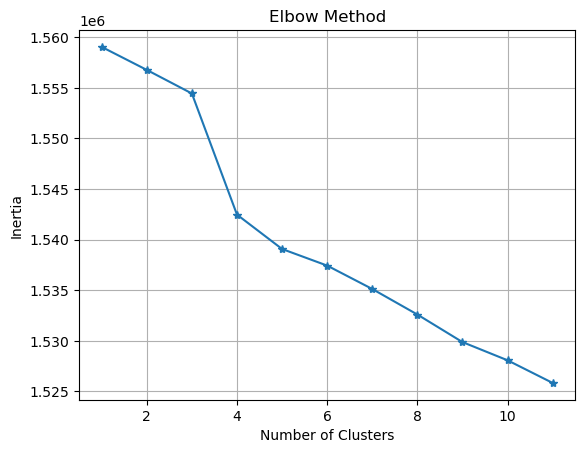

In [18]:
plt.plot(range(1,12), wcsse, marker = '*')
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [19]:
kmeans1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 44)
kmeans1.fit(X_scaled)
clusters = kmeans1.predict(X_scaled)

In [20]:
#X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [21]:
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)

In [22]:
X_scaled['Clusters'] = clusters

In [23]:
#X_scaled_df['Cluster'] = clusters

In [24]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.71689524, -1.31595762],
       [-2.48906603, -0.74527525],
       [ 1.64311877, -0.54282632],
       ...,
       [ 1.78019799, -0.16185542],
       [ 2.18109734,  1.40683551],
       [-2.03718536,  1.8990644 ]])

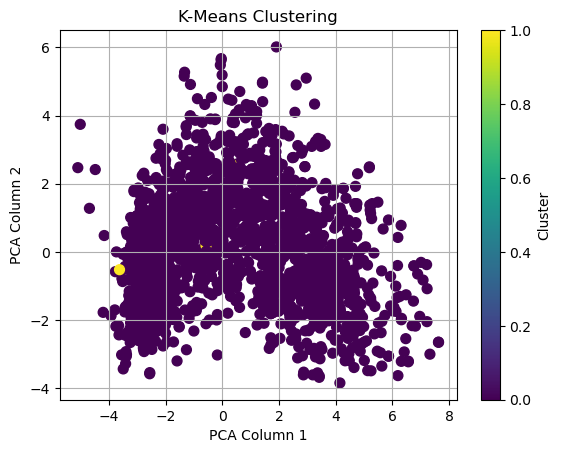

In [27]:
plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters, cmap = 'viridis', s = 50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Column 1")
plt.ylabel("PCA Column 2")
plt.colorbar(label = 'Cluster')
plt.grid(True)
plt.show()